In [1]:
import numpy as np
import pandas as pd
import matplotlib
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Numpy**


練習 1：softmax 函數

In [2]:
# 設定總共類別
c = 10
# 模擬輸出 logits
x = np.random.rand(c)
son = np.exp(x)
mom = np.sum(np.exp(x))
result = son/mom
print(result)

[0.06256001 0.10113952 0.12825089 0.14533899 0.06112347 0.11865884
 0.1367754  0.06740754 0.1064969  0.07224843]


練習 2：Linear Layer + ReLU Activation


In [3]:
# 設定輸入維度
d_in = 10
# 設定輸出維度
d_out = 30

# 模擬神經網路輸入
x = np.ones((d_in, 1))
print(x.shape)
# 模擬神經網路權重
W = np.random.rand(d_out, d_in) * 10 - 5
print(W.shape)
# 模擬神經網路偏差值
b = np.random.rand(d_out, 1) * 10 - 5
print(b.shape)
#計算ReLU結果
y = np.matmul(W,x)+b
y = np.maximum(y,0)
print(y.shape)
print(y)

(10, 1)
(30, 10)
(30, 1)
(30, 1)
[[ 0.        ]
 [ 4.74382039]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 6.86554495]
 [ 2.37699504]
 [16.49464622]
 [ 0.        ]
 [ 0.        ]
 [ 1.12983903]
 [ 0.        ]
 [ 0.        ]
 [ 0.57932444]
 [18.37256865]
 [23.38457629]
 [ 7.97297753]
 [ 7.99876106]
 [ 5.75427456]
 [ 5.58880667]
 [ 0.        ]
 [ 0.        ]
 [ 3.98184766]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 2.77393797]
 [ 0.        ]
 [ 1.07107067]]


### **pandas**

練習 1：數值轉換

In [4]:
UV = pd.read_csv("/content/drive/MyDrive/colab_input/467410.csv")
level = pd.DataFrame(index=range(31), columns=['level'])
UV = pd.concat([UV, level],axis = 1)
count = np.zeros(5)

for i in range(31):
  if(UV['UV'][i] < 3):
    UV['level'][i] = '低'
    count[0] +=1
  elif(UV['UV'][i] >= 3 and UV['UV'][i] < 6):
    UV['level'][i] = '中'
    count[1] +=1
  elif(UV['UV'][i] >= 6 and UV['UV'][i] < 8):
    UV['level'][i] = '高'
    count[2] +=1
  elif(UV['UV'][i] >= 8 and UV['UV'][i] < 11):
    UV['level'][i] = '甚高'
    count[3] +=1
  else:
    UV['level'][i] = '極高'
    count[4] +=1
count = count.astype(int)
print(pd.concat([UV['day'], UV['UV'], UV['level']],axis = 1))
print('紫外線強度等級「低、中、高、甚高、極高」分別出現',count[0],'、',count[1],'、',count[2],'、',count[3],'、',count[4],'次')

    day     UV level
0     1  11.36    極高
1     2   4.04     中
2     3  11.09    極高
3     4  11.20    極高
4     5  14.32    極高
5     6  12.18    極高
6     7   7.86     高
7     8  10.59    甚高
8     9   7.48     高
9    10  13.28    極高
10   11  10.20    甚高
11   12  14.75    極高
12   13  13.58    極高
13   14  11.64    極高
14   15   8.33    甚高
15   16  10.73    甚高
16   17  12.77    極高
17   18   7.37     高
18   19  13.84    極高
19   20  13.46    極高
20   21  12.87    極高
21   22  13.90    極高
22   23  13.35    極高
23   24   8.20    甚高
24   25  13.88    極高
25   26  13.17    極高
26   27  12.94    極高
27   28  11.96    極高
28   29  10.57    甚高
29   30  12.94    極高
30   31  12.50    極高
紫外線強度等級「低、中、高、甚高、極高」分別出現 0 、 1 、 3 、 6 、 21 次


<ipython-input-4-135f6dd83e15>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UV['level'][i] = '極高'
<ipython-input-4-135f6dd83e15>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UV['level'][i] = '中'
<ipython-input-4-135f6dd83e15>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UV['level'][i] = '高'
<ipython-input-4-135f6dd83e15>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

練習 2：條件篩選

In [5]:
UV = pd.read_csv("/content/drive/MyDrive/colab_input/467410.csv")
strength = pd.DataFrame(columns=['str'])
UV = pd.concat([UV, strength],axis = 1)
for i in range(31):
  UV['str'][i] = UV['volumn'][i] / UV['hour'][i]
UV['str'].fillna(0);
str_avg = UV['str'].mean()
print('平均降水強度 = ',str_avg)
print('降水強度大於平均降水強度：')
print(UV[UV['str'] >= str_avg])

平均降水強度 =  5.230778673822601
降水強度大於平均降水強度：
    day  volumn  hour     UV  temperature  speed  direction        str
1     2    91.0   3.6   4.04         27.5    1.9        200  25.277778
6     7    36.5   2.8   7.86         28.7    1.8        100  13.035714
8     9    11.5   1.7   7.48         29.1    1.9         20   6.764706
9    10    29.0   3.1  13.28         28.9    2.4        360   9.354839
14   15    20.5   2.5   8.33         28.8    2.0        120        8.2
15   16    19.0   2.1  10.73         28.8    2.0         20   9.047619
16   17    28.0   4.3  12.77         28.5    2.6        220   6.511628
17   18    46.5   3.6   7.37         27.1    1.9         90  12.916667


<ipython-input-5-7864694046cc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UV['str'][i] = UV['volumn'][i] / UV['hour'][i]
<ipython-input-5-7864694046cc>:5: RuntimeWarning: invalid value encountered in scalar divide
  UV['str'][i] = UV['volumn'][i] / UV['hour'][i]


### **matplotlib**

練習 1：折線圖

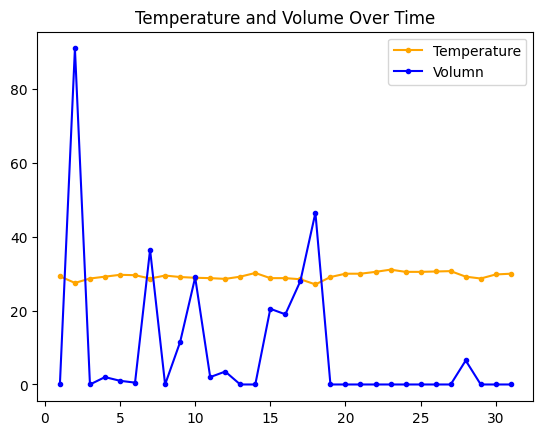

In [6]:
data = pd.read_csv('/content/drive/MyDrive/colab_input/467410.csv')
y1 = data['temperature']
y2 = data['volumn']
x = data['day']
plt.plot(x,y1,color = 'orange',label = 'Temperature',marker = '.')
plt.plot(x,y2,color = 'blue',label = 'Volumn',marker = '.')
plt.title('Temperature and Volume Over Time')
plt.legend()
plt.show()

練習 2：雷達圖

想法參考自matplotlib網站：
https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_bar.html#sphx-glr-gallery-pie-and-polar-charts-polar-bar-py


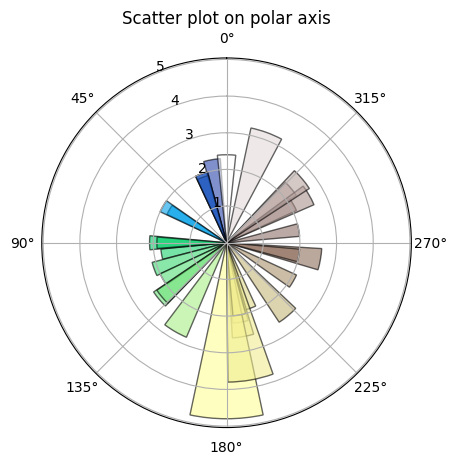

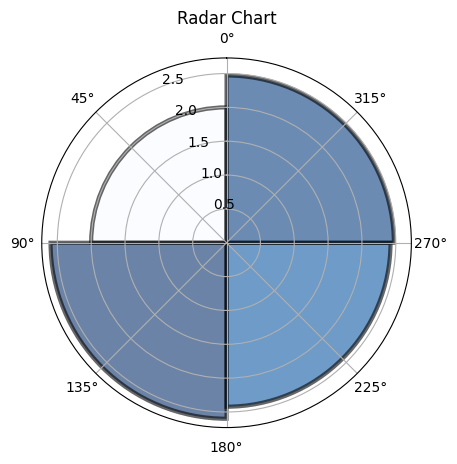

In [7]:
data = pd.read_csv('/content/drive/MyDrive/colab_input/467410.csv')

#分析風速與風向之間的關係
x = data['direction']*np.pi/180
radius = data['speed']
width = np.pi / 36 * radius
cmap = plt.cm.terrain(x/x.max())

ax = plt.subplot(projection='polar')
ax.set_title('Scatter plot on polar axis')
ax.set_theta_zero_location('N')
ax.bar(x, radius, width = width, bottom = 0, color = cmap, alpha = 0.6
       , edgecolor = 'black', linewidth = 1,align = 'center')

plt.show()


# 平均風速
m = np.zeros(4)
first = data[(0 < data['direction']) & (data['direction'] <=90)]
m[0] = np.mean(first['speed'])
second = data[(90 < data['direction']) & (data['direction'] <=180)]
m[1] = np.mean(second['speed'])
third = data[(180 < data['direction']) & (data['direction'] <=270)]
m[2] = np.mean(third['speed'])
fourth = data[(270 < data['direction']) & (data['direction'] <=360)]
m[3] = np.mean(fourth['speed'])

# 雷達圖
theta = np.linspace(0, 2*np.pi, 4, endpoint=False)
radius = m
width = np.pi / 2
cmap = plt.cm.Blues((m-2)*2)

ax = plt.subplot(projection='polar')
ax.set_title('Radar Chart')
ax.set_theta_zero_location('N')
ax.bar(theta, radius, width = width, bottom = 0, color = cmap, alpha = 0.6
       , edgecolor = 'black', linewidth = 3,align = 'edge')

plt.show()

### **scikit-learn**

練習 1：改善決策樹分類模型

<ipython-input-8-b5e9e6a0db74>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x['Age'] = imputer.transform(age)
<ipython-input-8-b5e9e6a0db74>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x['Age'] = train_x['Age'].astype(int)
<ipython-input-8-b5e9e6a0db74>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

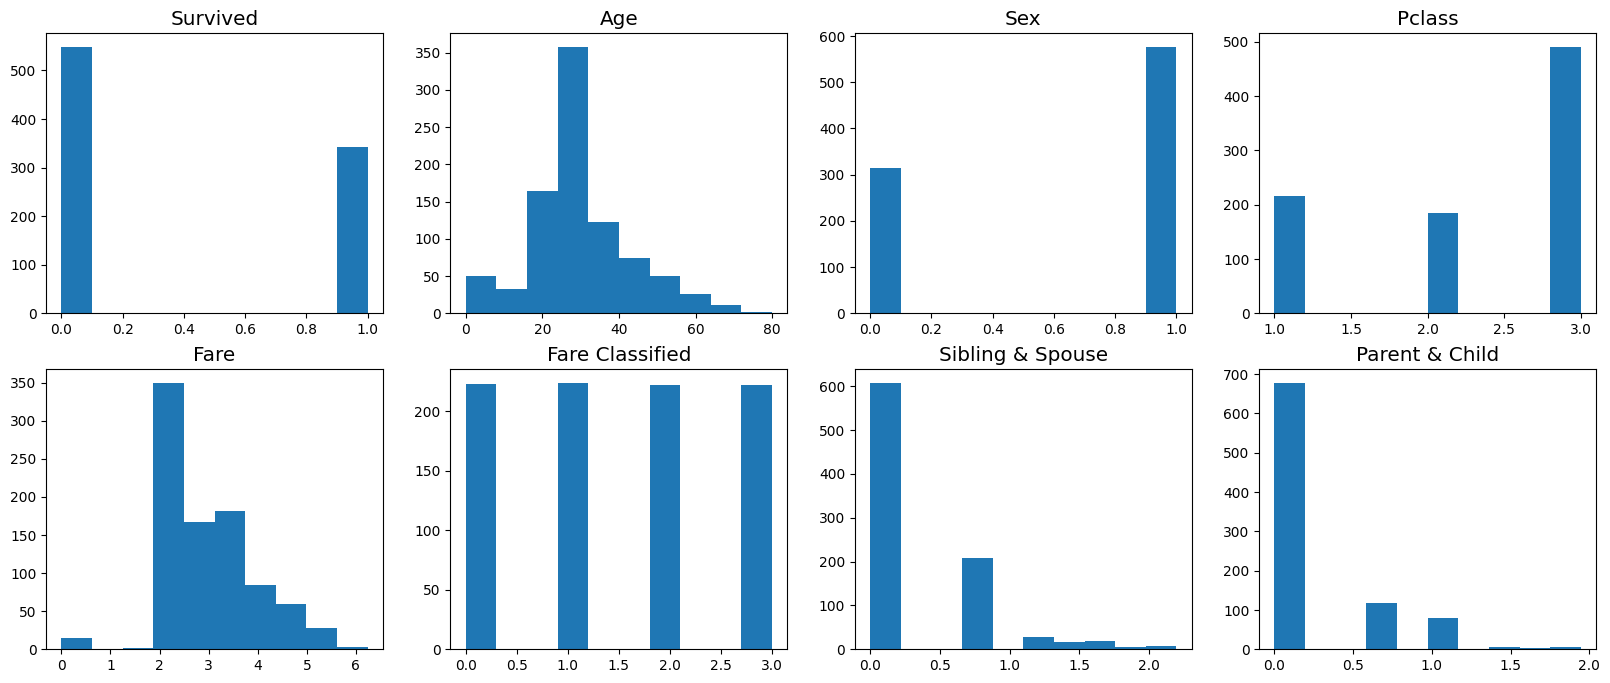

In [8]:
# 資料
train = pd.read_csv('/content/drive/MyDrive/colab_input/titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/colab_input/titanic/test.csv')
train_x = train[['Sex', 'Age','Pclass','SibSp','Parch','Fare']]
train_y = train['Survived']

# 填補缺失值
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
age = train_x['Age'].to_numpy().reshape(-1, 1)
imputer.fit(age)
train_x['Age'] = imputer.transform(age)
train_x['Age'] = train_x['Age'].astype(int)

# One-hot encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
hot = LabelEncoder()
hot.fit(train_x['Sex'])
train_x['Sex'] = hot.transform(train_x['Sex'])
reshaped_data = np.expand_dims(train_x['Sex'], axis=1)
onehot_enc = OneHotEncoder()
transformed = onehot_enc.fit_transform(reshaped_data).toarray()

# 將Fare取Log，並且依照25,50,75%將Fare Mapping為四個種類
train_x['Fare'] = np.log(train_x['Fare']+1)
train_x.loc[ train_x['Fare'] <= train_x['Fare'].describe().loc['25%'], 'Fare_c'] = 0
train_x.loc[(train_x['Fare'] > train_x['Fare'].describe().loc['25%']) & (train_x['Fare'] <= train_x['Fare'].describe().loc['50%']), 'Fare_c'] = 1
train_x.loc[(train_x['Fare'] > train_x['Fare'].describe().loc['50%']) & (train_x['Fare'] <= train_x['Fare'].describe().loc['75%']), 'Fare_c'] = 2
train_x.loc[ train_x['Fare'] > train_x['Fare'].describe().loc['75%'], 'Fare_c'] = 3
train_x['Fare_c'] = train_x['Fare_c'].astype(int)

# Histogram
fig, ax = plt.subplots(2, 4, figsize=(20, 8))
plt.style.use('ggplot')
# survive
ax[0, 0].hist(train_y)
ax[0, 0].set_title("Survived")
# Age
ax[0, 1].hist(train_x['Age'])
ax[0, 1].set_title("Age")
# Sex
ax[0, 2].hist(train_x['Sex'])
ax[0, 2].set_title("Sex")
# Pclass
ax[0, 3].hist(train_x['Pclass'])
ax[0, 3].set_title("Pclass")
# Fare
ax[1, 0].hist(train_x['Fare'])
ax[1, 0].set_title("Fare")
# Fare_c
ax[1, 1].hist(train_x['Fare_c'])
ax[1, 1].set_title("Fare Classified")
# 親屬數量
train_x['SibSp'] = np.log(train_x['SibSp']+1)
ax[1, 2].hist(train_x['SibSp'])
ax[1, 2].set_title("Sibling & Spouse")
# Parent & Child
train_x['Parch'] = np.log(train_x['Parch']+1)
ax[1, 3].hist(train_x['Parch'])
ax[1, 3].set_title("Parent & Child")

plt.show()

<Axes: title={'center': 'Pearson Correlation'}>

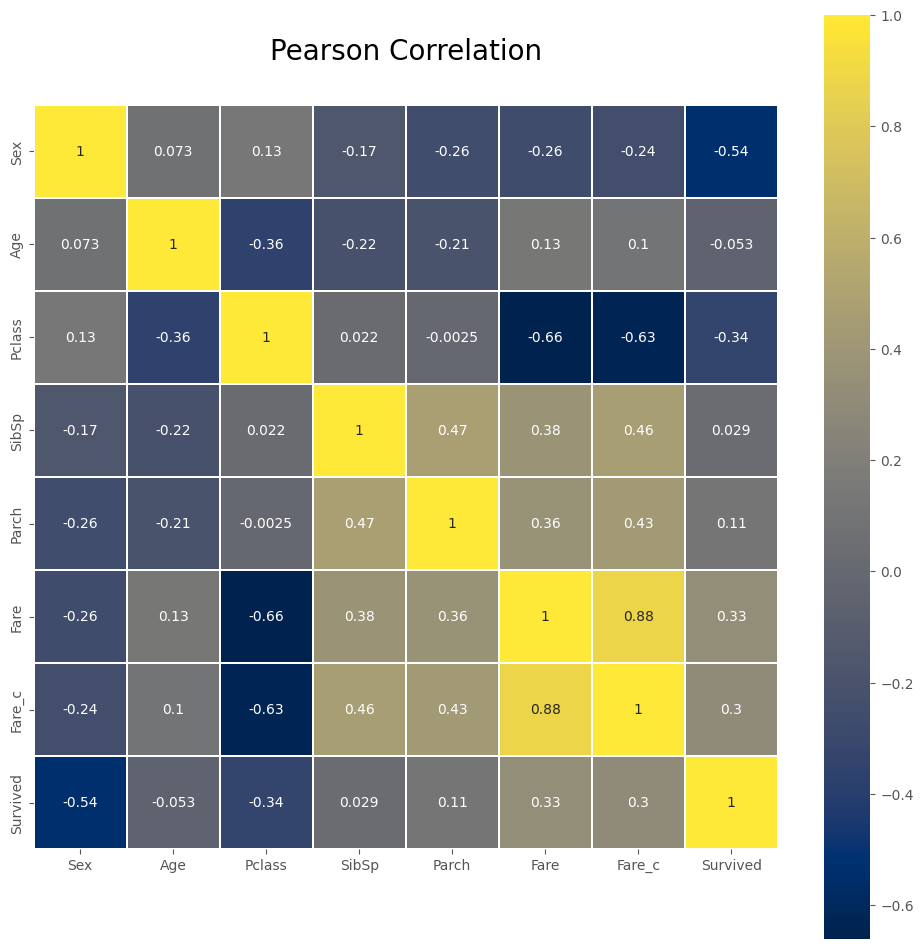

In [9]:
# 計算相關係數，挑選相關關係數高者作為輸入特徵
train_data = pd.concat([train_x, train_y], axis=1)
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation', y=1.05, size=20)
sns.heatmap(train_data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap='cividis', linecolor='white', annot=True)

In [10]:
train_x = train_x[['Sex','Pclass','Fare','Fare_c']]

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

(train_x_split, valid_x_split,train_y_split, valid_y_split) = train_test_split(
    train_x,
    train_y,
    train_size=0.8,
    random_state=1012
)
model = DecisionTreeClassifier(
    random_state=1012,
    criterion='entropy',
    max_depth=25,
    max_leaf_nodes=2 ** 25
)
model.fit(train_x_split, train_y_split)

train_pred_y = model.predict(train_x_split)
train_acc = accuracy_score(train_y_split,train_pred_y)
valid_pred_y = model.predict(valid_x_split)
valid_acc = accuracy_score(valid_y_split,valid_pred_y)

print('train accuracy: {}'.format(train_acc))
print('valid accuracy: {}'.format(valid_acc))

train accuracy: 0.9143258426966292
valid accuracy: 0.7821229050279329


練習 2：使用不同的模型

In [11]:
# SVM
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1.0, gamma='auto', random_state=1012)
svm_model.fit(train_x_split, train_y_split)

train_pred_y = svm_model.predict(train_x_split)
train_acc = accuracy_score(train_y_split,train_pred_y)
valid_pred_y = svm_model.predict(valid_x_split)
valid_acc = accuracy_score(valid_y_split,valid_pred_y)

print('train accuracy: {}'.format(train_acc))
print('valid accuracy: {}'.format(valid_acc))

train accuracy: 0.8132022471910112
valid accuracy: 0.7597765363128491


In [12]:
# Bayes
from sklearn.naive_bayes import GaussianNB
Bayes_model = GaussianNB()
Bayes_model.fit(train_x_split, train_y_split)

train_pred_y = Bayes_model.predict(train_x_split)
train_acc = accuracy_score(train_y_split,train_pred_y)
valid_pred_y = Bayes_model.predict(valid_x_split)
valid_acc = accuracy_score(valid_y_split,valid_pred_y)

print('train accuracy: {}'.format(train_acc))
print('valid accuracy: {}'.format(valid_acc))

train accuracy: 0.7401685393258427
valid accuracy: 0.7094972067039106


In [13]:
# Neighbor
from sklearn.neighbors import KNeighborsClassifier
nei_model = KNeighborsClassifier(n_neighbors=3)
nei_model.fit(train_x_split, train_y_split)

train_pred_y = nei_model.predict(train_x_split)
train_acc = accuracy_score(train_y_split,train_pred_y)
valid_pred_y = nei_model.predict(valid_x_split)
valid_acc = accuracy_score(valid_y_split,valid_pred_y)

print('train accuracy: {}'.format(train_acc))
print('valid accuracy: {}'.format(valid_acc))

train accuracy: 0.875
valid accuracy: 0.7821229050279329


In [14]:
# Ensemble
from sklearn.ensemble import RandomForestClassifier
en_model = RandomForestClassifier(n_estimators=100, random_state=42)
en_model.fit(train_x_split, train_y_split)

train_pred_y = en_model.predict(train_x_split)
train_acc = accuracy_score(train_y_split,train_pred_y)
valid_pred_y = en_model.predict(valid_x_split)
valid_acc = accuracy_score(valid_y_split,valid_pred_y)

print('train accuracy: {}'.format(train_acc))
print('valid accuracy: {}'.format(valid_acc))

train accuracy: 0.9143258426966292
valid accuracy: 0.7821229050279329
